** Zadanie 0. **  (2 punkty) <br>
Zaimplementuj algorytm K-Means. Postaraj si
ę
, 
ż
eby implementacja była efektywna, bo b
ę
dzie on 
w    przyszło
ś
ci    u
ż
ywany    do    przetwarzania    du
ż
ych    zbiorów    danych.    Sprawd
ź
    działanie 
zaimplementowanego algorytmu na danych IRIS. 

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets 
iris = datasets.load_iris()

In [20]:
def kmeans(k, train_set):
    epsilon = 1e-1
    centroids = init_centroids(k, train_set)
    while(True):
        closest = clasify_points(train_set, centroids)
        new_centroids = move_centroids(centroids, train_set, closest)
        #TODO: if needed, randomly reinitialize centroids of empty clasters
        if(((centroids-new_centroids)**2).sum() < epsilon):
            break
        centroids = new_centroids
    return (closest, new_centroids)
    
def init_centroids(k, points):
    centroids = points.copy()
    np.random.shuffle(centroids)
    return centroids[:k]

def clasify_points(points, centroids):
    coord_difference = (points - centroids[:, np.newaxis, :])
    #distances = np.sqrt((coord_difference**2).sum(axis=2)) #can be without sqrt()
    distances = (coord_difference**2).sum(axis=2)
    return np.argmin(distances, axis=0)

def move_centroids(centroids, points, closest):
    new_centroid_coords = np.empty(shape=[0, points.shape[1]])
    for k in range(centroids.shape[0]):
        new_center = points[closest==k].mean(axis=0)
        new_centroid_coords = np.append(new_centroid_coords, [new_center], axis=0)
    return new_centroid_coords

In [3]:
def cluster(k, train_set):
    closest, centroids = kmeans(k, train_set)
    clusters = []
    for i in range(k):
        clusters.append(train_set[closest==i])
    scatter_clusters(clusters, centroids)
    
def scatter_clusters(clusters, centroids):
    for k in range(centroids.shape[0]):
        color = np.random.rand(3,)
        plt.scatter(clusters[k][:,0], clusters[k][:,1], c=color)
    plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=100)

In [4]:
iris = np.vstack((iris.data[:,0], iris.data[:,1])).T
print(iris.shape)

(150, 2)


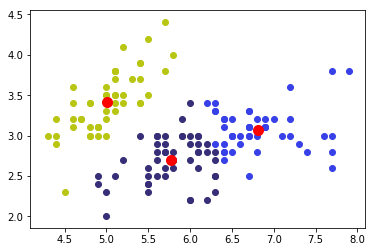

In [5]:
cluster(3, iris)

**Zadanie 1.** (1 punkt) <br>
Napisz  program,  który  generuje  zbiór  N  =  5000  losow
ych  wektorów  danych  z  mieszaniny 
rozkładów gaussowskich o ni
ż
ej podanych parametrach i sprawd
ź
 działanie algorytmu K-Means na 
tym  zbiorze  (rozkład  Choleskiego  macierzy  kowarianc
ji  mo
ż
na  w  Matlabie  uzyska
ć
  poleceniem 
chol, a w Pythonie poleceniem cholesky). <br>
a) d = 2, K = 5, 
p
 = 1/K * 
1
, 
μ
k
 = 3k * 
1
, 
Σ
k
 = 
I
 (dla k = 1, 2, ..., K), <br>
b) jak w a), oprócz 
Σ
3
 = [3 0; 0 1], <br>
c) jak w b), oprócz 
Σ
1
 = [3 1; 1 1], <br>
d) jak w c), oprócz 
p
 = [0.2; 0.1; 0.3; 0.1; 0.3], <br>
e) jak w a), oprócz d = 3 i 
Σ
3
 = [3 1 0; 1 1 0; 0 0 1], <br>
f) jak w a), oprócz d = 100 i K = 10. <br>
(
1
 to wektor odpowiedniej długo
ś
ci zło
ż
ony z samych jedynek, 
I
 to macierz identyczno
ś
ciowa). <br>
Jak pogrupowałby
ś
 te dane, je
ś
li nie znałby
ś
 warto
ś
ci K u
ż
ytej w generatorze? 

**Zadanie 2.** (1 punkt)<br>
Wygeneruj  zbiór  N  =  1000000  losowych  danych  z  d  =  1
000  wymiarowej  mieszaniny  K  =  1000 
rozkładów  gaussowskich  takiej, 
ż
e  odległo
ść
  mi
ę
dzy 
ś
rodkami 
μ
k
  ka
ż
dych  dwóch  rozkładów  tej 
mieszaniny jest nie mniejsza ni
ż
 q = 10. Prawdopodobie
ń
stwa wyboru rozkładów mog
ą
 by
ć
 równe, 
p
  =  1/K  * 
1
,  a  same  rozkłady  mog
ą
  mie
ć
  nieskorelowane  zmienne, 
Σ
k
  = 
I
.  Sprawd
ź
  działanie 
algorytmu K-Means na tym zbiorze. Poeksperymentuj z
 innymi warto
ś
ciami parametru q. 

**Zadanie 3.** (2 punkty)<br>
W  UCI  Machine  Learning  Repository  (http://archive.ics.uci.edu/ml/)  mo
ż
na  znale
źć
  przykładowe 
dane  do  testowania  działania  algorytmów  eksploracji
  danych.  Pobierz  5  zestawów  danych  (Iris, 
Wine  oraz  3  inne  wybrane  przez  siebie).  Zapoznaj  si
ę
  z  opisem  tych  danych.  Spróbuj  opisa
ć
charakterystyk
ę
  tych  danych.  Spróbuj  przedstawi
ć
  te  dane  na  wykresach.  Sprawd
ź
  jak  dobrze 
mo
ż
na  je  pogrupowa
ć
  za  pomoc
ą
  znanych  Ci  algorytmów  grupowania  (sprawd
ź
  co  najmniej  K-
Means). 

(178, 2)


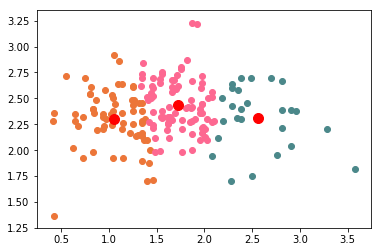

In [6]:
from numpy import genfromtxt
wine = genfromtxt('wine.data', delimiter=',')
wine = np.vstack((wine[:,9], wine[:,3])).T
print(wine.shape)
cluster(3, wine)

**Zadanie 4.** (2 punkty)<br>
Zdj
ę
cie fotograficzne o rozdzielczo
ś
ci A x B w formacie RGB mo
ż
na traktowa
ć
 jako zbiór N = A * B 
trójwymiarowych punktów danych. Po przeprowadzeniu 
grupowania takich danych, z liczb
ą
 grup K, 
mo
ż
na  obni
ż
y
ć
  liczb
ę
  kolorów  zdj
ę
cia  do  K  (tworz
ą
c  palet
ę
  K  kolorów  okre
ś
lonych  przez 
ś
rodki 
uzyskanych  grup,  a  nast
ę
pnie  zast
ę
puj
ą
c  kolor  ka
ż
dego  piksela  najbli
ż
szym  mu  kolorem  ze 
stworzonej palety). Napisz program wczytuj
ą
cy  zdj
ę
cie z pliku JPG (polecenie imread w  Matlabie 
lub  w  Pythonie),  redukuj
ą
cy  liczb
ę
  kolorów  w  powy
ż
szy  sposób  i  wy
ś
wietlaj
ą
cy  zredukowane 
zdj
ę
cie na ekranie. Sprawd
ź
 działanie programu na 5 wybranych przez siebie zdj
ę
ciach. 

In [8]:
from scipy import misc
from IPython.display import Image
from IPython.display import display

In [12]:
def reduce_img(source, dest, colors):
    pic = misc.imread(source)
    data = pic.reshape([-1, 3])
    closest, centroids = kmeans(colors, data)
    res = np.take(centroids,closest,0).reshape(pic.shape)
    misc.imsave(dest, res)
    display(Image(filename=source), Image(filename=dest))

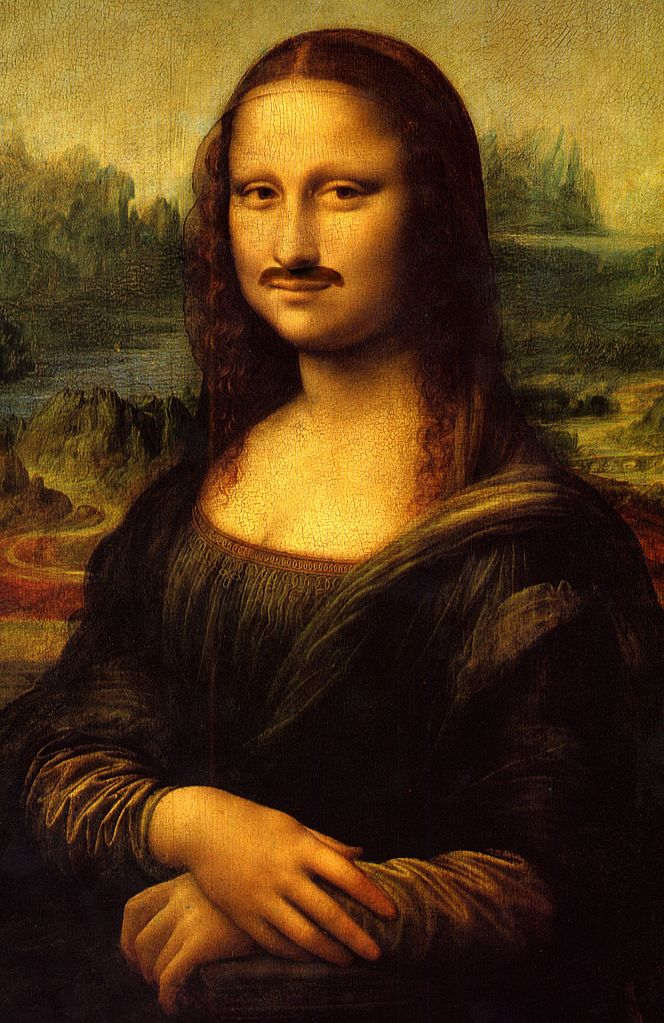

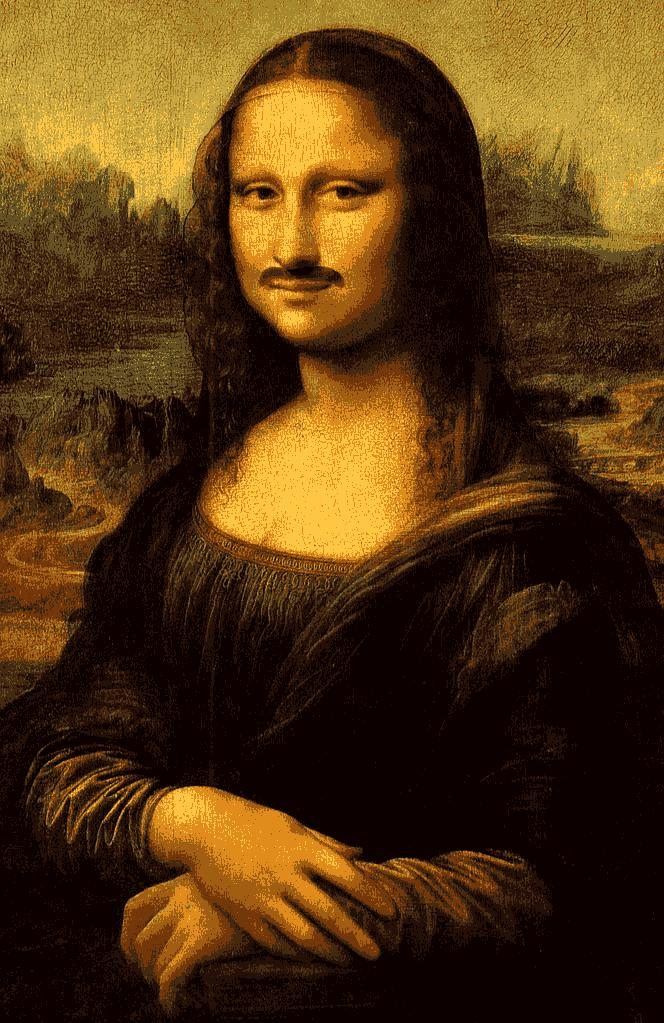

In [ ]:
reduce_img('lisa.jpg', 'lisa-reduced.jpg', 10)

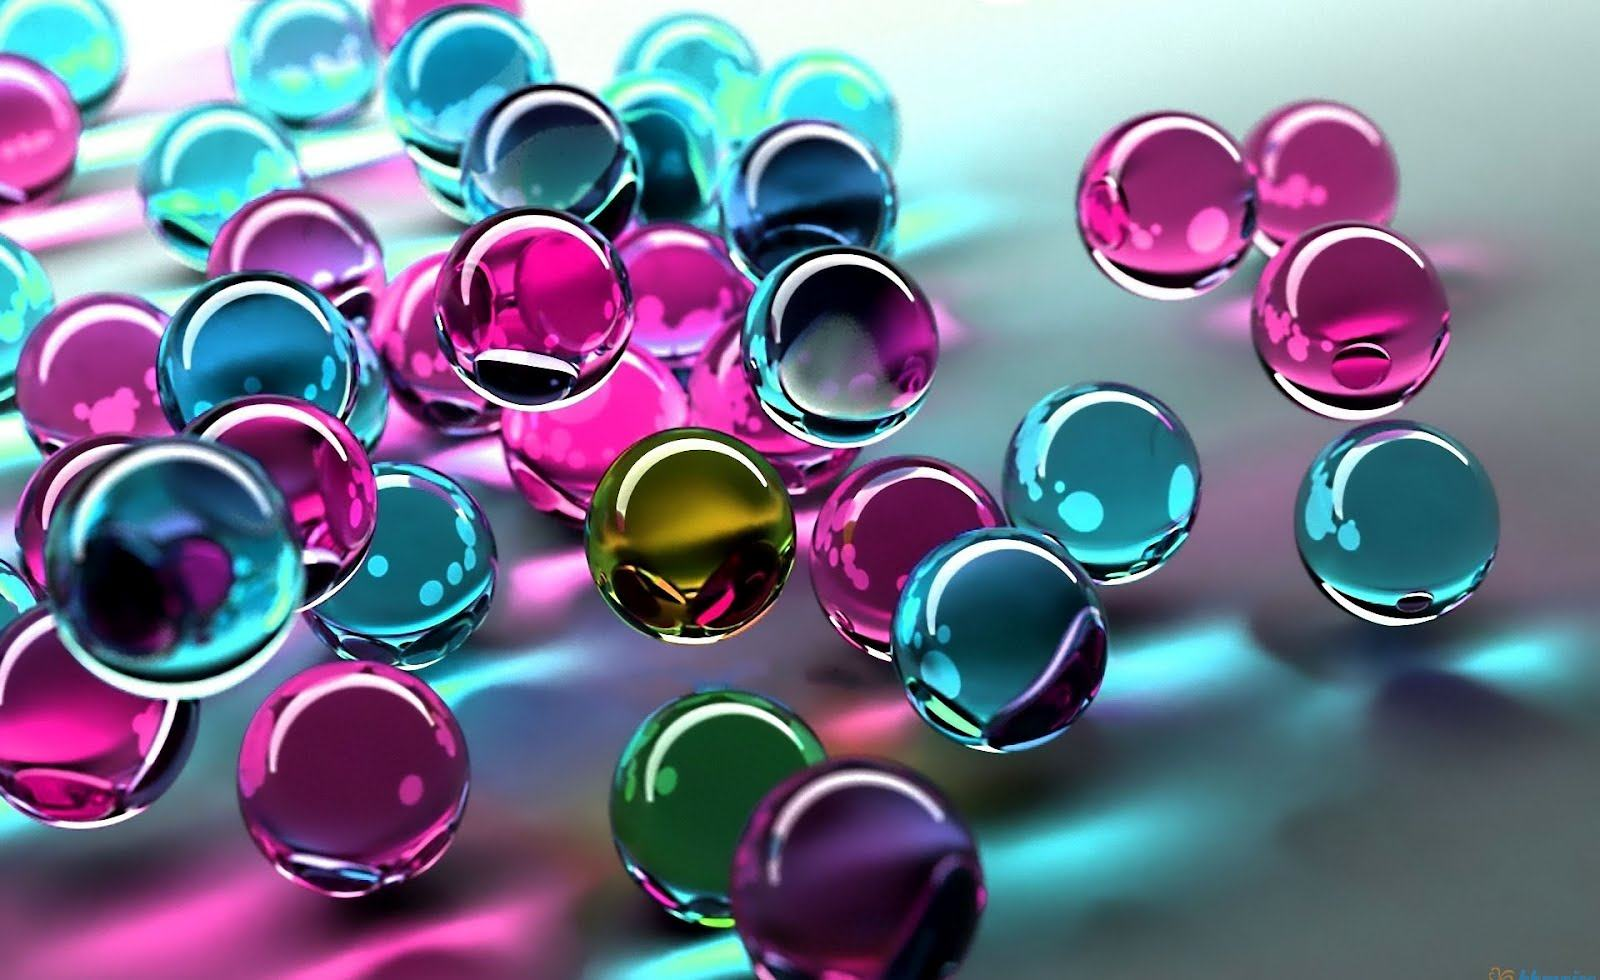

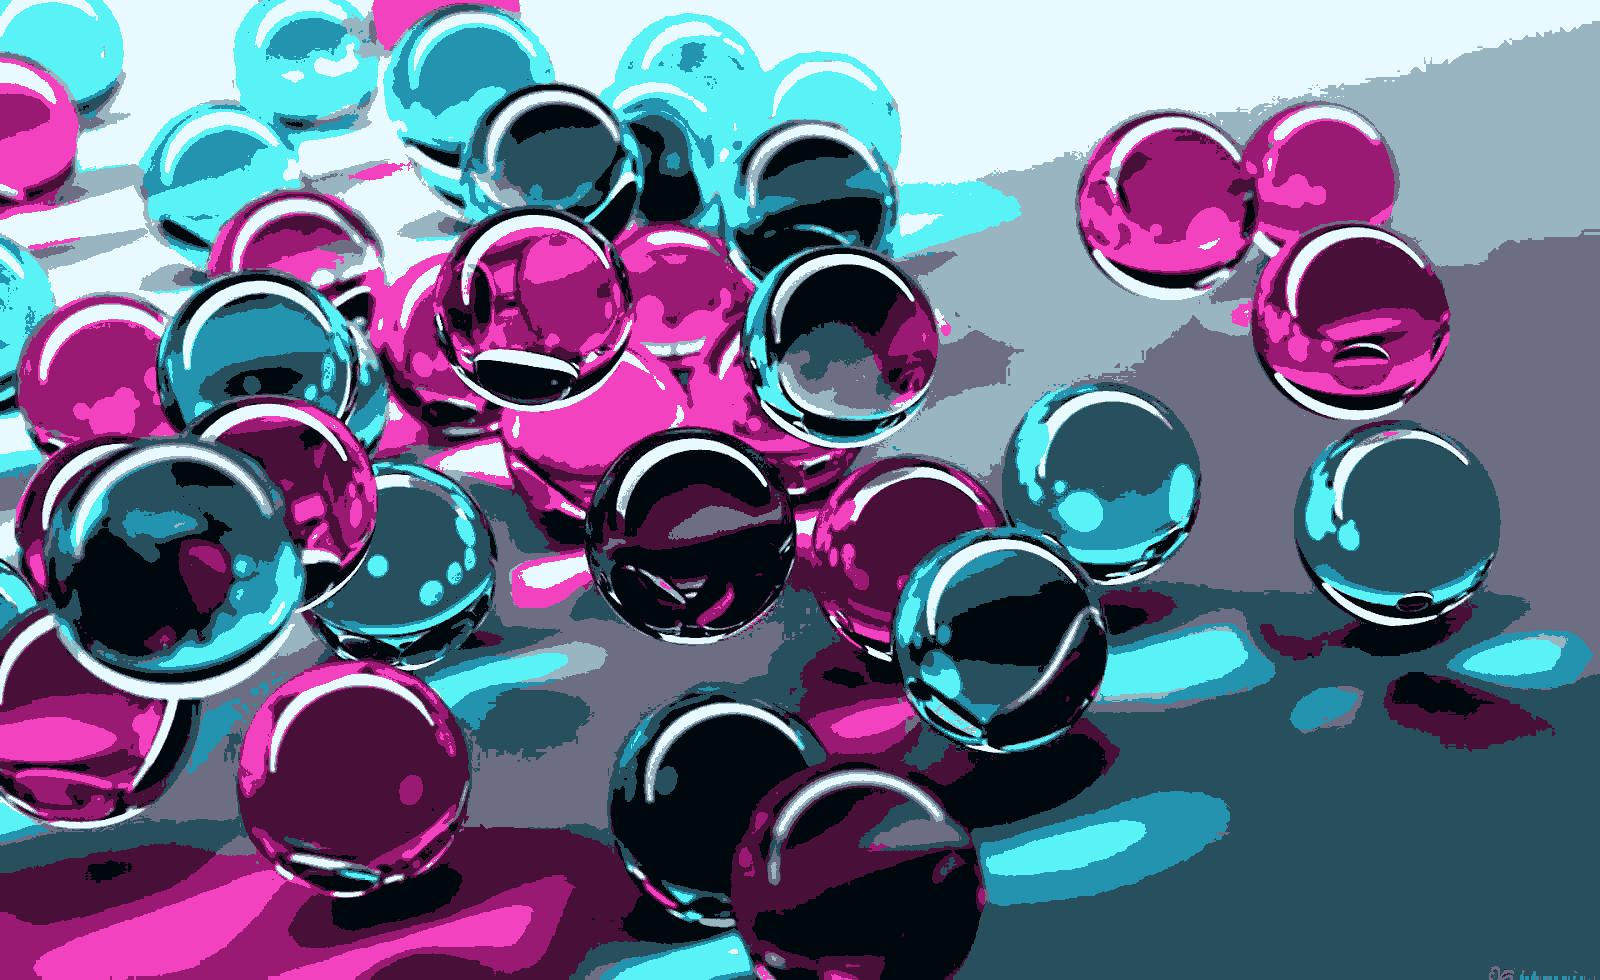

In [105]:
reduce_img('balls.jpg', 'balls-reduced.jpg', 10)

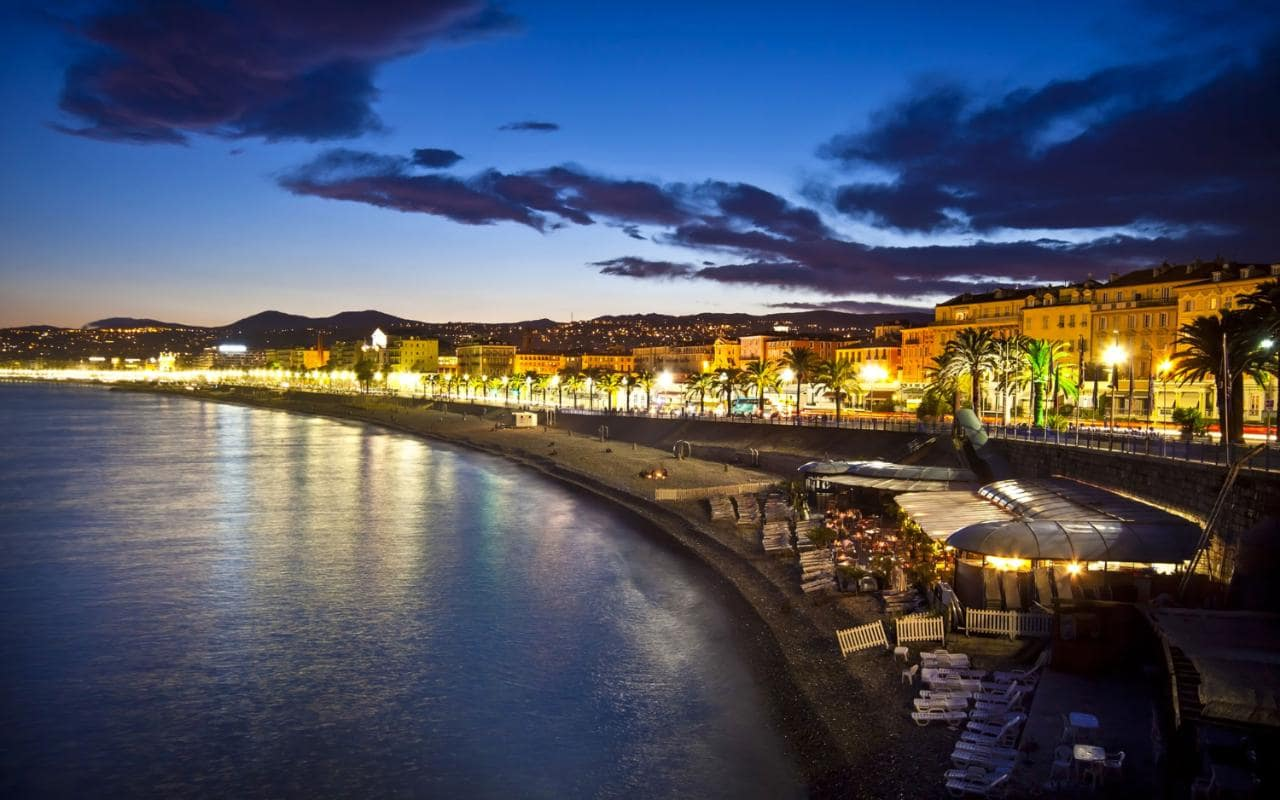

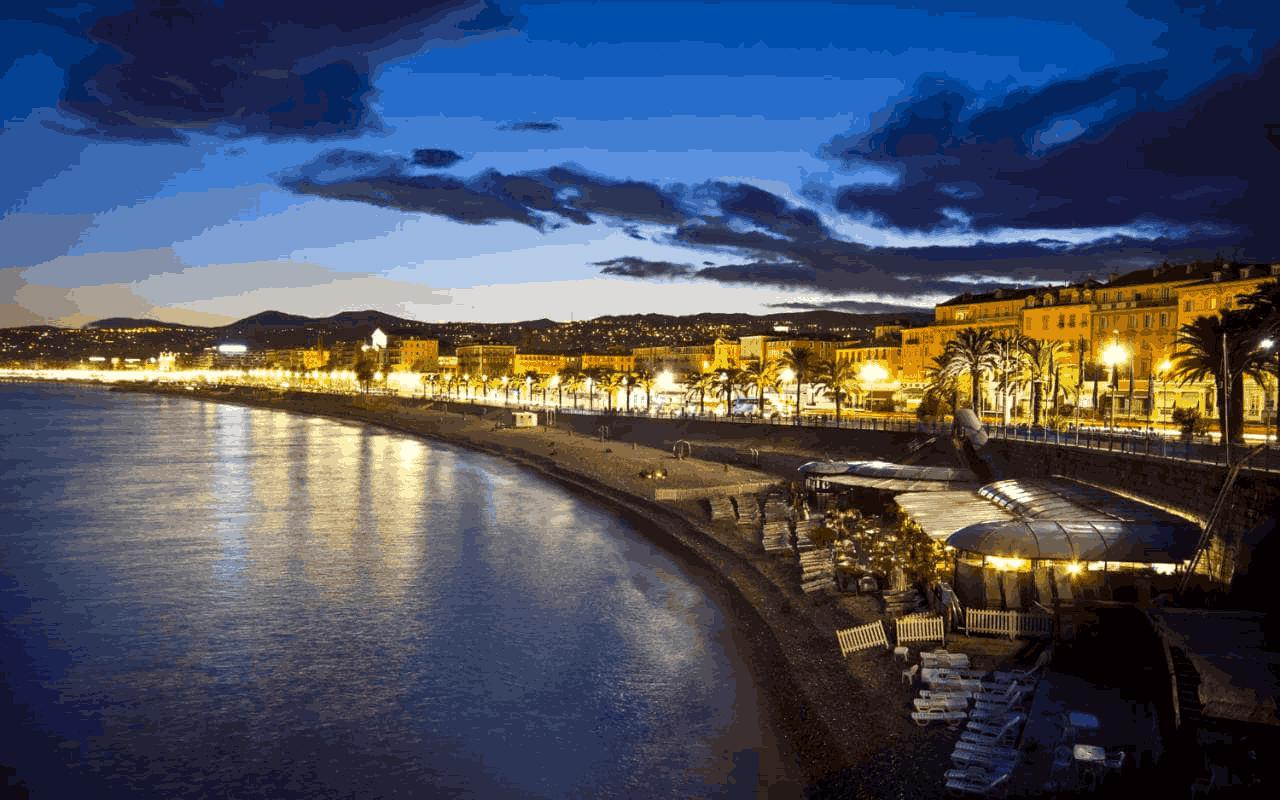

In [17]:
reduce_img('night.jpg', 'night-reduced.jpg', 64)

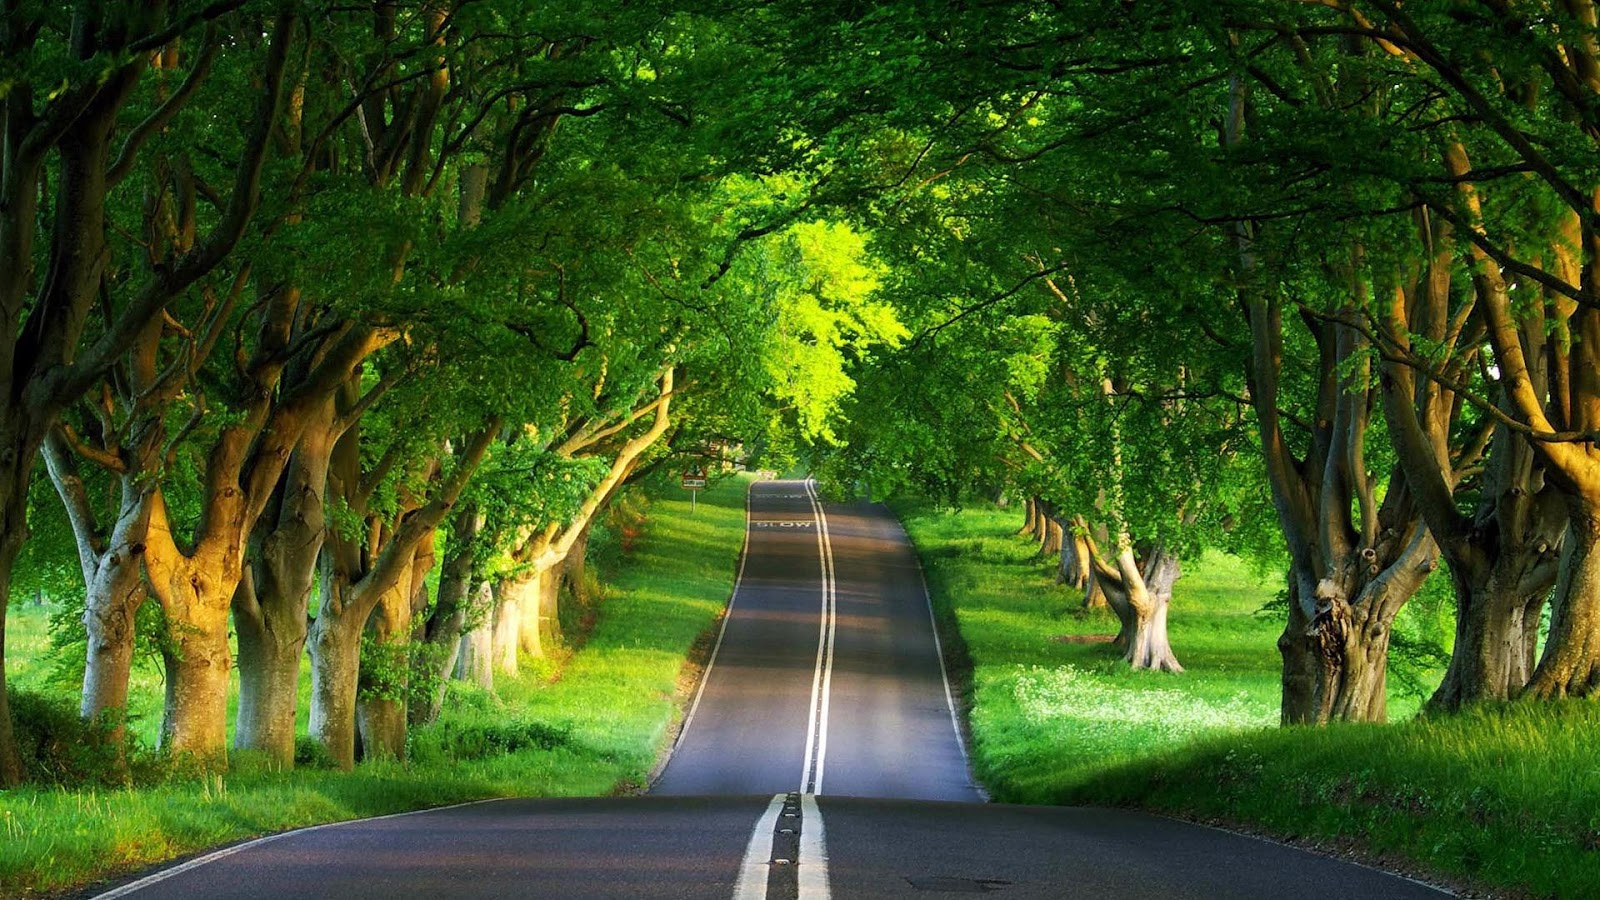

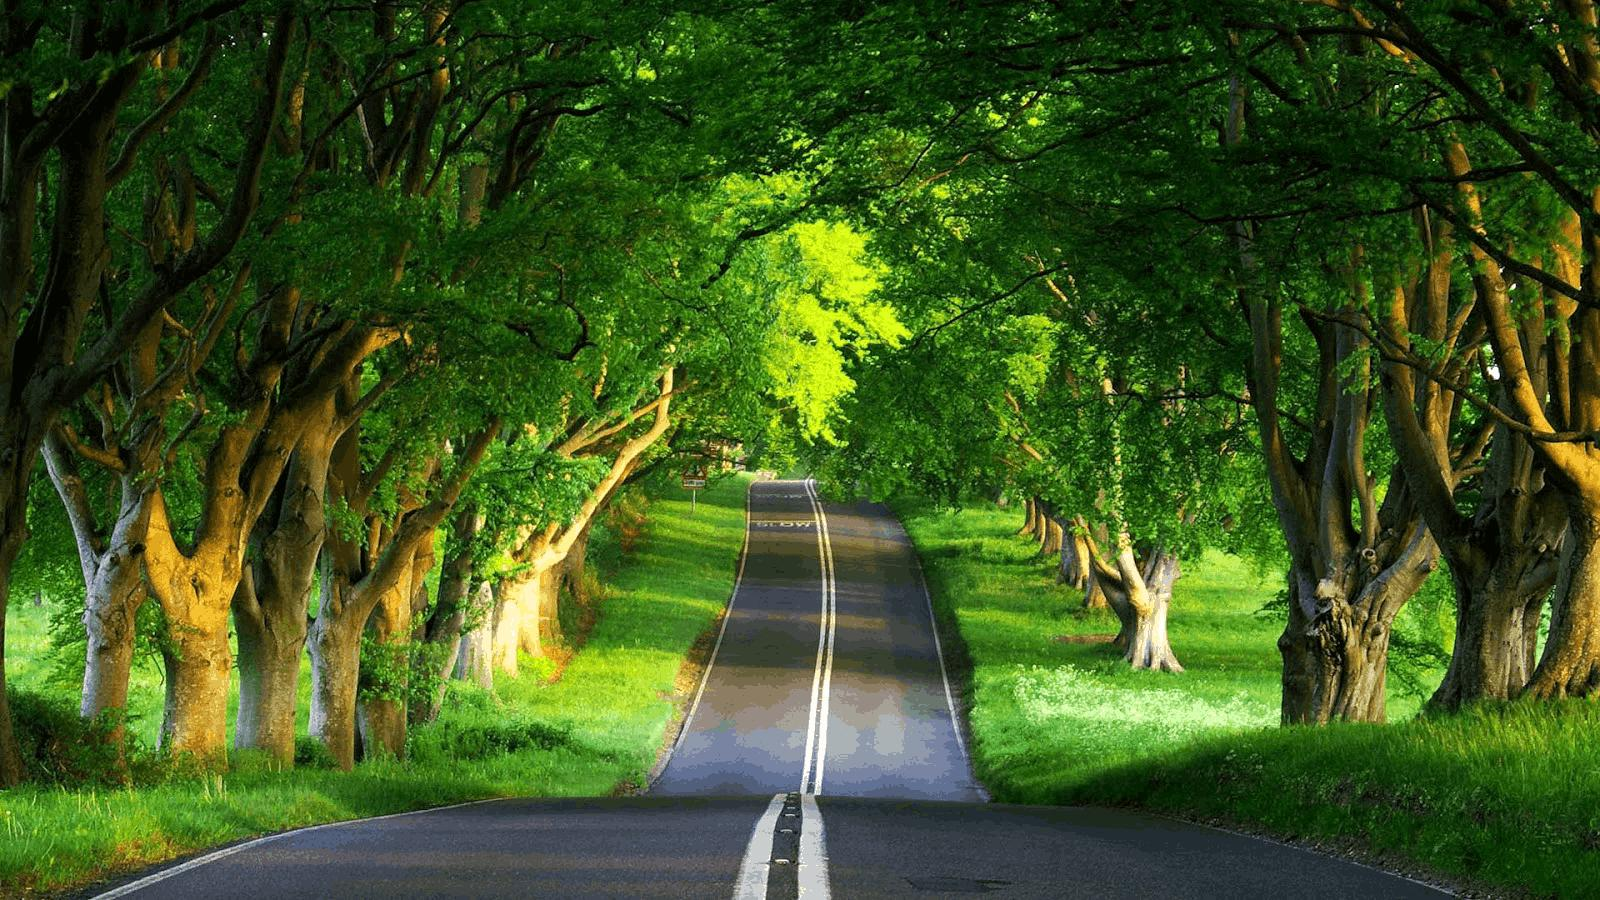

In [18]:
reduce_img('road.jpg', 'road-reduced.jpg', 128)

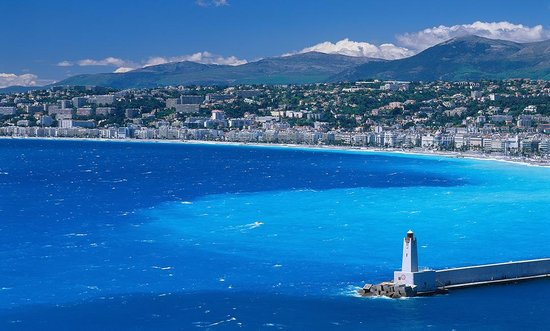

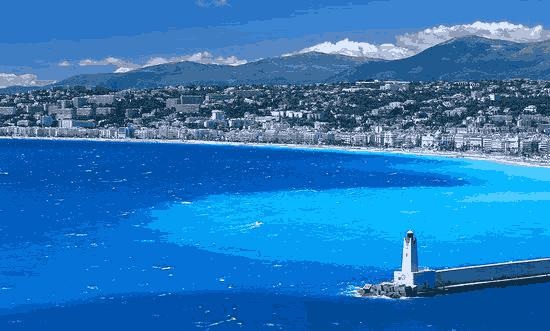

In [15]:
reduce_img('sea.jpg', 'sea-reduced.jpg', 20)

**Zadanie 5.** (2 punkty)<br>
Zbiór 
danych 
Kosarak 
(stworzony 
przez 
Ferenca 
Bodon
a, 
dost
ę
pny 
m.in. 
na 
http://fimi.ua.ac.be/data/kosarak.dat.gz)  zawiera  i
nformacje  o  transakcjach  zawartych   w  sieci 
supermarketów.  Ka
ż
dy  wiersz  tego  pliku  reprezentuje  jedn
ą
  transakcj
ę
  i  zawiera  identyfikatory 
produktów kupionych w tej transakcji. 
a)  Wyznacz  T  =  1000  najcz
ęś
ciej  kupowanych  produktów  (tzn.  produktów,  które  po
jawiły  si
ę
  w 
najwi
ę
kszej liczbie transakcji). Oznaczmy je kolejno Z
1
, Z
2
, ..., Z
T
. 
b) Dla ka
ż
dego produktu, policz ile razy był on kupowany raze
m z produktem Z
i
 (dla i =1, 2, ..., T) 
tworz
ą
c w ten sposób wektor liczbowy 
p
 = (p
1
, p
2
, ..., p
T
) opisuj
ą
cy dany produkt. 
c) Pogrupuj produkty u
ż
ywaj
ą
c ich powy
ż
szej reprezentacji oraz algorytmu K-Means z ró
ż
n
ą
 liczb
ą
grup (poeksperymentuj). 
Przedstaw  wyniki  swoich  eksperymentów.  Mo
ż
esz  tak
ż
e  poeksperymentowa
ć
  z  parametrem  T. 
Które grupy produktów mo
ż
na uzna
ć
 za szczególnie istotne, a które za raczej przypadk
owe? 